O notebook da Aula 1 foi separado em duas etapas:
- [Explicações e Aula Alura](https://github.com/LincolnVS/ImersaoDadosAlura/blob/main/Aula_01.ipynb)
- [Desafios e Playground](https://github.com/LincolnVS/ImersaoDadosAlura/blob/main/Aula_01_Desafios.ipynb)

*Obs:* Esse é o notebook de **Desafios e Playground**

# Playground (testes e afins)

### Importando dados

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 15) #mostra apenas 15 colunas quando manda plotar tudo (esse dataset tem mais de 800)
import matplotlib.pyplot as plt
import numpy as np

url_dados = 'https://github.com/LincolnVS/ImersaoDadosAlura/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

### Entender os dados

In [ ]:
dados.head(5)

,id,tratamento,tempo,dose,droga,g-0,g-1,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Entendendo os dados
- index = valor numérico crescente para cada experimento {0 até 23813}
- id = identificador único para cada experimento
- tempo = tempo de espera para análise {24, 48, 72}
- tratamento = categorias {com_droga, com_controle}
- dose = Diferentes Dosagens {D1, D2}
- drogas = tipos de substâncias testadas {Drogas com nomes anonimos para não ter viés}
- g_ = dados de expressão genética, dados normalizados {provavelmente de -2 a 2}
- c- correspondem a viabilidade celular. A viabilidade celular é uma medida da proporção de células vivas saudáveis ​​dentro de uma população


In [ ]:
dict_tempos = dados['tempo'].value_counts().to_dict()

for key in dict_tempos:
  print(f"Temos {dict_tempos[key]} amostras com {key} horas")

Temos 8250 amostras com 48 horas
Temos 7792 amostras com 72 horas
Temos 7772 amostras com 24 horas


In [ ]:
dict_drogas = dados['droga'].value_counts().to_dict()

for key in dict_drogas:
  #print(f"Temos {dict_drogas[key]} amostras com a droga {key}")
  continue

### Avaliando Grafico de pizza

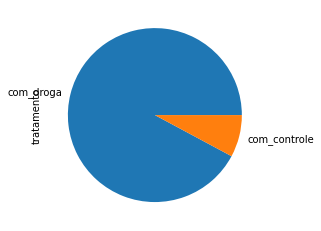

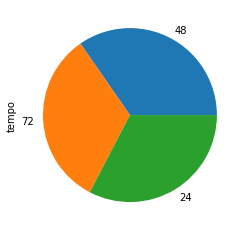

In [ ]:
dados['tratamento'].value_counts().plot.pie()
plt.show()
dados['tempo'].value_counts().plot.pie()
plt.show()

Com esses 2 graficos que conseguimos extrair a seguinte informação:
- 1º: o tratamento parece desbalanceado (temos mais testes com drogas do que com_controle)
- 2º: O tempo das amostras é mais balanceado quando comparado com o tratamento
- 3º: Não conseguimos extrair muitas informações de um grafico de pizza

*Recomendação: não utilizar graficos com nome de comida (e.g., pizza, donut)...*

# Desafios 

- *Desafio 01*: Investigar por que a classe tratamento é tão desbalanceada?
- *Desafio 02*: Plotar as 5 últimas linhas da tabela
- *Desafio 03*: Proporção das classes tratamento.
- *Desafio 04*: Quantas tipos de drogas foram investigados.
- *Desafio 05*: Procurar na documentação o método query(pandas). 
- *Desafio 06*: Renomear as colunas tirando o hífen. 
- *Desafio 07*: Deixar os gráficos bonitões. (Matplotlib.pyplot)
- *Desafio 08*: Resumir o que você aprendeu com os dados.

## Desafio 1

**Investigar por que a classe tratamento é tão desbalanceada?**

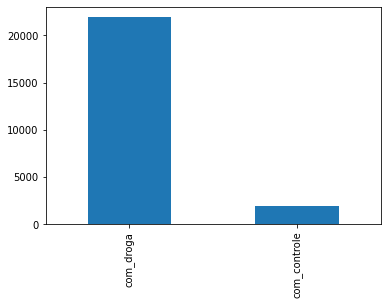


Temos 21948 amostras com_droga, 1866 amostras com_controle. Isso da 1076.2057877813504% de amostras a mais com_droga!


In [ ]:
dados['tratamento'].value_counts().plot.bar()
plt.show()
#dados['tratamento'].value_counts().plot.pie()
#plt.show()

dict_tratamento = dados['tratamento'].value_counts().to_dict()
n_droga = dict_tratamento['com_droga']
n_controle = dict_tratamento['com_controle']
percent= ((n_droga-n_controle)/n_controle)*100
print( f'\nTemos {n_droga} amostras com_droga, {n_controle} amostras com_controle. Isso da {percent}% de amostras a mais com_droga!')

Ao comparar os tratamentos, `com_droga` tem muito mais amostras do que `com_controle`. Entretanto, o tratamento `com_droga` também tem subdivisões, mas o tratamento `com_controle` não, vamos mais fundo nessas subdivisões.

In [ ]:
drogas_count = dados['droga'].value_counts()
print(f'Temos um total de {len(drogas_count)} drogas utilizadas! As 10 mais utilizadas são:\n')
print(drogas_count.head(10))

Temos um total de 3289 drogas utilizadas! As 7 mais utilizadas são:

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
Name: droga, dtype: int64


Podemos ver que uma droga se destaca, essa droga é `cacb2b860`. Mas tem algo estranho, os valores dessa droga são exatamente iguais aos do tratamento `com_controle`. Vamos analisar!

In [ ]:
dados_com_controle = dados[dados['tratamento'] == 'com_controle']
dados_com_controle['droga'].value_counts()

cacb2b860    1866
Name: droga, dtype: int64

Todas as amostras `com_controle` tem como droga `cacb2b860`. E por definição, `com_controle` significa sem droga, ou seja, `cacb2b860 == sem droga`. Então, Quando comparado com cada droga separado, `com_controle` tem mais que o dobro de amostras do que o tratamento com a segunda maior droga. Vamos visualizar isso!



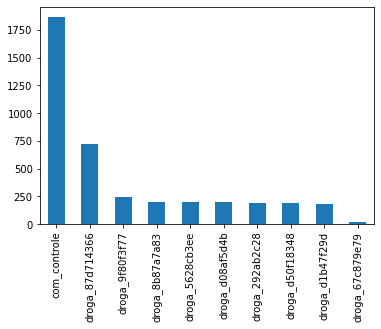

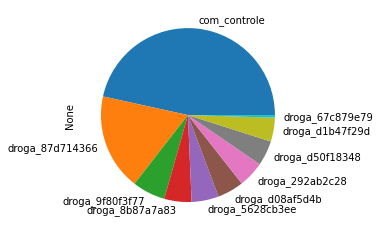

In [ ]:
dados_para_visualizar = dados.copy()

dados_para_visualizar['tratamento'].replace('com_droga','droga',inplace=True)
dados_para_visualizar['droga'].replace('cacb2b860','',inplace=True)

dados_tratamento_e_drogas = dados_para_visualizar['tratamento'] + '_' + dados_para_visualizar['droga']
dados_tratamento_e_drogas.replace('com_controle_','com_controle',inplace=True)

dados_tratamento_e_drogas.value_counts()[:10].plot.bar()
plt.show()
dados_tratamento_e_drogas.value_counts()[:10].plot.pie()
plt.show()

Ainda notamos uma diferença entre os tratamentos. Mas agora entendemos um pouco mais sobre como os dados estão balanceados. Resumidamente, `com_controle` possui um número menor de variaveis no tratamento comparado com `com_droga`, no agregado, realmente possui um número menor de amostras, mas não é tão desbalanceado quando comparamos com cada subdivisão que `com_droga` possui.

## Desafio 2

**Plotar as 5 últimas linhas da tabela**

In [ ]:
dados.tail(5)

,id,tratamento,tempo,dose,droga,g-0,g-1,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,...,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,...,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,...,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,...,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,...,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


## Desafio 3

**Proporção das classes tratamento.**

In [63]:
dados['tratamento'].value_counts(normalize = True)
#Percentual da com_droga é de aproximadamente 92.2%, com_controle é de 7.8%.

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

## Desafio 4

**Quantas tipos de drogas foram investigados.**

In [67]:
drogas_count = dados[dados['tratamento'] != "com_controle"]['droga'].value_counts()
print(f'Temos um total de {len(drogas_count)} drogas utilizadas! As 10 mais utilizadas são:\n')
print(drogas_count.head(10))

Temos um total de 3288 drogas utilizadas! As 10 mais utilizadas são:

87d714366    718
9f80f3f77    246
8b87a7a83    203
5628cb3ee    202
d08af5d4b    196
292ab2c28    194
d50f18348    186
d1b47f29d    178
67c879e79     19
52d1e6f43     18
Name: droga, dtype: int64


## Desafio 5

**Procurar na documentação o método query(pandas).**

## Desafio 6

**Renomear as colunas tirando o hífen.**

## Desafio 7

**Deixar os gráficos bonitões. (Matplotlib.pyplot)**

## Desafio 8

**Resumir o que você aprendeu com os dados.**